In [1]:
import pandas as pd
import sys
sys.path.append('../03-code/')
from config import PROJECT_ROOT_DIRECTORY, IDENTIFIER_DICT

In [2]:
organic_genome_dataframe = pd.read_csv(
    PROJECT_ROOT_DIRECTORY + '02-metadata/06-csv-files/01-organic-genome.csv', index_col='identifier'
)
organic_fingerprint_dataframe = pd.read_csv(
    PROJECT_ROOT_DIRECTORY + '02-metadata/06-csv-files/02-organic-fingerprints.csv', index_col='identifier'
)
mo_energetics_dataframe = pd.read_csv(
    PROJECT_ROOT_DIRECTORY + '02-metadata/06-csv-files/04-mo-energetics.csv', index_col='identifier'
)

In [3]:
dataframe = pd.concat([
    organic_genome_dataframe,
    organic_fingerprint_dataframe,
    mo_energetics_dataframe
], axis=1)
dataframe

,smiles_canonical,generation,ringcount,linkage_p,six_ring_p,primaryamine,linker_length,linker_position,hetero_nitrogen,fluorination,furan,pyrrole,sidechain_on_linker,sidechain_on_backbone,HOMO,LUMO,HOMO_LUMO_gap
identifier,,,,,,,,,,,,,,,,,
1,[NH3+]Cc1cc2sc(C[NH3+])cc2s1,2.0,2.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-12.630,-7.888,4.742
2,[NH3+]Cc1cc2sc([NH3+])cc2s1,3.0,2.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.185,-8.346,4.839
3,[NH3+]c1cc2sc([NH3+])cc2s1,4.0,2.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-13.801,-8.847,4.954
4,[NH3+]Cc1ccc(C[NH3+])s1,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-14.221,-8.494,5.727
5,[NH3+]Cc1ccc(C[NH3+])o1,2.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,-14.147,-8.370,5.777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40605,[NH3+]Cc1ccc2nc(-c3cs[nH+]n3)[nH]c2c1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40606,[NH3+]Cc1ccc2nc(-c3cn[nH+]s3)[nH]c2c1,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40607,Cc1c[nH+]nc2oc(C[NH3+])nc12,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
new_dataframe = dataframe.query('generation <= 3 and linkage_p == 0 and furan == 0 and pyrrole == 0')[['smiles_canonical','ringcount', 'HOMO_LUMO_gap', 'hetero_nitrogen','fluorination']]
new_dataframe

,smiles_canonical,ringcount,HOMO_LUMO_gap,hetero_nitrogen,fluorination
identifier,,,,,
1,[NH3+]Cc1cc2sc(C[NH3+])cc2s1,2.0,4.74200,0.0,0.0
2,[NH3+]Cc1cc2sc([NH3+])cc2s1,2.0,4.83900,0.0,0.0
4,[NH3+]Cc1ccc(C[NH3+])s1,1.0,5.72700,0.0,0.0
7,Cc1cc(C[NH3+])ccc1C[NH3+],1.0,5.61891,0.0,0.0
8,[NH3+]Cc1c[nH+]sc1,1.0,5.47300,0.0,0.0
...,...,...,...,...,...
36476,CC([NH3+])c1ccc2c(F)c(C[NH3+])sc2c1,2.0,4.51411,0.0,1.0
36477,CC([NH3+])c1sc2cc(C[NH3+])ccc2c1F,2.0,4.57451,0.0,1.0
36478,Cc1cc2c(F)c(C[NH3+])sc2cc1C[NH3+],2.0,4.37990,0.0,1.0


In [15]:
new_dataframe.to_csv(PROJECT_ROOT_DIRECTORY + '02-metadata/06-csv-files/05-organic-genome-filtered.csv',index=False)


In [2]:
hse_frontier_dataframe = pd.read_csv(
    PROJECT_ROOT_DIRECTORY + '02-metadata/06-csv-files/08-hse-frontier.csv', index_col='identifier'
)

In [3]:
import plotly.graph_objects as go

dataframe = hse_frontier_dataframe.copy()
dataframe['lumo_cbm_mismatch'] = dataframe['organic_LUMO'] - dataframe['inorganic_cbm_z']
dataframe['vbm_homo_mismatch'] = dataframe['inorganic_vbm_z'] - dataframe['organic_HOMO']
dataframe.loc[IDENTIFIER_DICT['acene'], 'type'] = 'acene'

# Create the Plotly figure
fig = go.Figure()

# Add scatter plot for energy level alignment with points colored by 'type'

fig.add_trace(go.Scatter(
    x=dataframe['lumo_cbm_mismatch'],
    y=dataframe['vbm_homo_mismatch'],
    mode='markers',
    marker=dict(size=5, symbol='circle-open'),
    text=dataframe.index,  # Optional: add index as hover text
    hovertemplate='LUMO-CBM Mismatch: %{x}<br>VBM-HOMO Mismatch: %{y}<br>Index: %{text}',
        ))

    # Add dashed lines for the quadrant boundaries
fig.add_trace(go.Scatter(
    x=[0, 0],
    y=[-2, 6],
    mode='lines',
    line=dict(dash='dash', color='gray'),
    showlegend=False
    ))

fig.add_trace(go.Scatter(
    x=[-2, 6],
    y=[0, 0],
    mode='lines',
    line=dict(dash='dash', color='gray'),
    showlegend=False
    ))

    # Update layout to ensure square axes area
fig.update_layout(
    title='Energy Level Alignment Quadrant',
    xaxis=dict(title='LUMO-CBM Mismatch', range=[-2, 6], scaleanchor='y', scaleratio=1),
    yaxis=dict(title='VBM-HOMO Mismatch', range=[-2, 6]),
    width=500,
    height=500,
    template='simple_white',
    legend=dict(title='Type'),
    )
fig.update_xaxes(showline=True, mirror=True)
fig.update_yaxes(showline=True, mirror=True)

In [4]:
dataframe = hse_frontier_dataframe.copy()
dataframe['lumo_cbm_mismatch'] = dataframe['organic_LUMO'] - dataframe['inorganic_cbm_z']
dataframe['vbm_homo_mismatch'] = dataframe['inorganic_vbm_z'] - dataframe['organic_HOMO']
    
#dataframe.loc[IDENTIFIER_DICT['oligothiophene'], 'type'] = 'thiophene'
dataframe.loc[IDENTIFIER_DICT['typeII_a'], 'type'] = 'type_IIa'
dataframe.loc[IDENTIFIER_DICT['typeII_b'], 'type'] = 'type_IIb'
dataframe.loc[IDENTIFIER_DICT['typeI_b'], 'type'] = 'type_Ib'
dataframe.loc[IDENTIFIER_DICT['existing'], 'type'] = 'existing'


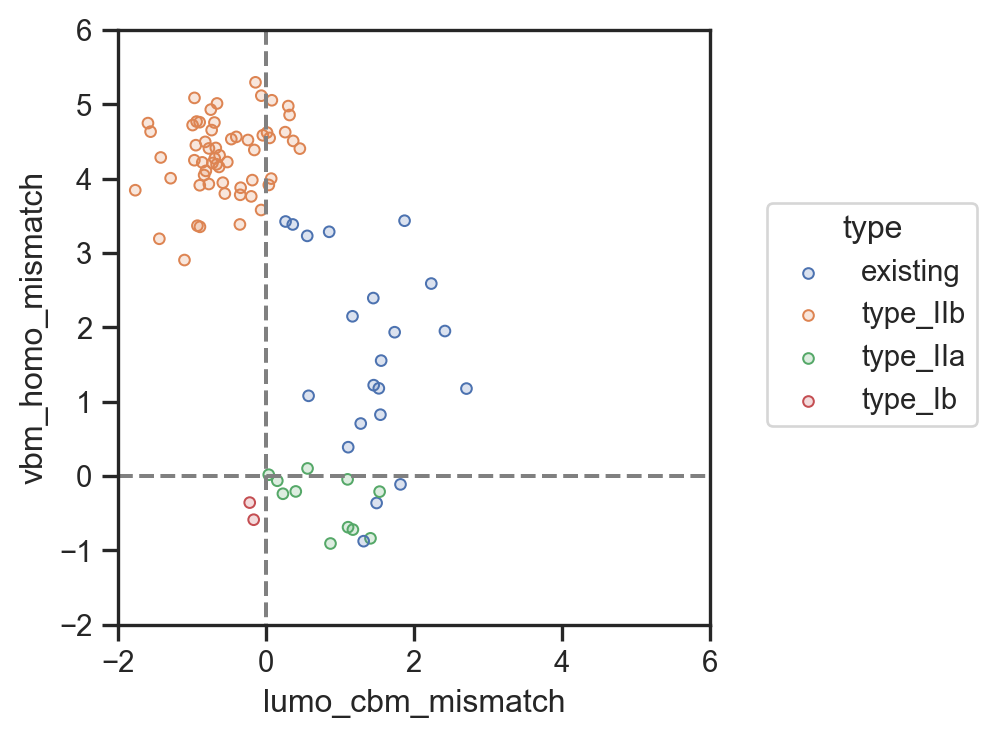

In [5]:
# function using seaborn plot
import seaborn.objects as so
import matplotlib.pyplot as plt
from seaborn import axes_style

    
p = (
        so.Plot(data=dataframe, x='lumo_cbm_mismatch', y='vbm_homo_mismatch')
        .add(so.Dots(), color='type')
        .add(so.Line(linestyle='--', color='.5'), 
             data=pd.DataFrame(data={'x':[0,0], 'y': [-2,6]}), 
             x='x', y='y')
        .add(so.Line(linestyle='--', color='.5'), 
             data=pd.DataFrame(data={'x':[-2,6], 'y': [0,0]}), 
             x='x', y='y')
        .limit(x=(-2,6), y=(-2,6)) #-2,6
        .theme(axes_style("ticks"))
        .layout(size=(4,4))
)
p


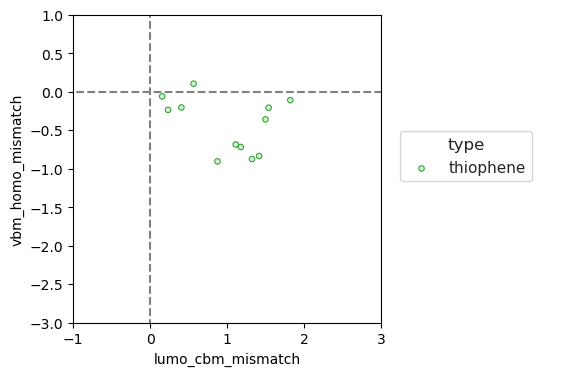

In [12]:

fig, ax = plt.subplots(figsize=(4,4))
p.on(ax).plot()
ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
fig.savefig('../rawfigures/energy-level-alignment-quadrant.svg')


In [13]:
import plotly.graph_objects as go
import pandas as pd

def plot_energy_level_alignment_quadrant():

    # Create the Plotly figure
    fig = go.Figure()

    # Add scatter plot for energy level alignment with points colored by 'type'
    for alignment_type in dataframe['type'].unique():
        filtered_data = dataframe[dataframe['type'] == alignment_type]
        fig.add_trace(go.Scatter(
            x=filtered_data['lumo_cbm_mismatch'],
            y=filtered_data['vbm_homo_mismatch'],
            mode='markers',
            marker=dict(size=5, symbol='circle-open'),
            name=alignment_type,
            text=filtered_data.index,  # Optional: add index as hover text
            hovertemplate='LUMO-CBM Mismatch: %{x}<br>VBM-HOMO Mismatch: %{y}<br>Index: %{text}',
        ))

    # Add dashed lines for the quadrant boundaries
    fig.add_trace(go.Scatter(
        x=[0, 0],
        y=[-2, 6],
        mode='lines',
        line=dict(dash='dash', color='gray'),
        showlegend=False
    ))

    fig.add_trace(go.Scatter(
        x=[-2, 6],
        y=[0, 0],
        mode='lines',
        line=dict(dash='dash', color='gray'),
        showlegend=False
    ))

    # Update layout to ensure square axes area
    fig.update_layout(
        title='Energy Level Alignment Quadrant',
        xaxis=dict(title='LUMO-CBM Mismatch', range=[-2, 6], scaleanchor='y', scaleratio=1),
        yaxis=dict(title='VBM-HOMO Mismatch', range=[-2, 6]),
        width=500,
        height=500,
        template='simple_white',
        legend=dict(title='Type'),
    )
    fig.update_xaxes(showline=True, mirror=True)
    fig.update_yaxes(showline=True, mirror=True)

    return fig


fig = plot_energy_level_alignment_quadrant()
fig.show()


In [ ]:
#save figure
fig.write_image('../rawfigures/energy_level_alignment_quadrant.svg')

In [9]:
spacer_selection_dataframe = pd.DataFrame(
    data={'generation': [0,1,2,3,4,5,6,7,8,9,10,11],
          'type_Ib': [0,0,0,0,0,0,0,1,1,1,0,0],
          'type_IIa-1': [0,0,0,1,2,2,3,2,1,1,0,0],
          'type_IIa-2': [0,0,0,0,1,2,0,0,0,0,0,0],
          'type_IIb': [0,0,2,15,19,16,6,0,0,0,0,0],
          }
)
spacer_selection_dataframe

,generation,type_Ib,type_IIa-1,type_IIa-2,type_IIb
0,0,0,0,0,0
1,1,0,0,0,0
2,2,0,0,0,2
3,3,0,1,0,15
4,4,0,2,1,19
5,5,0,2,2,16
6,6,0,3,0,6
7,7,1,2,0,0
8,8,1,1,0,0
9,9,1,1,0,0


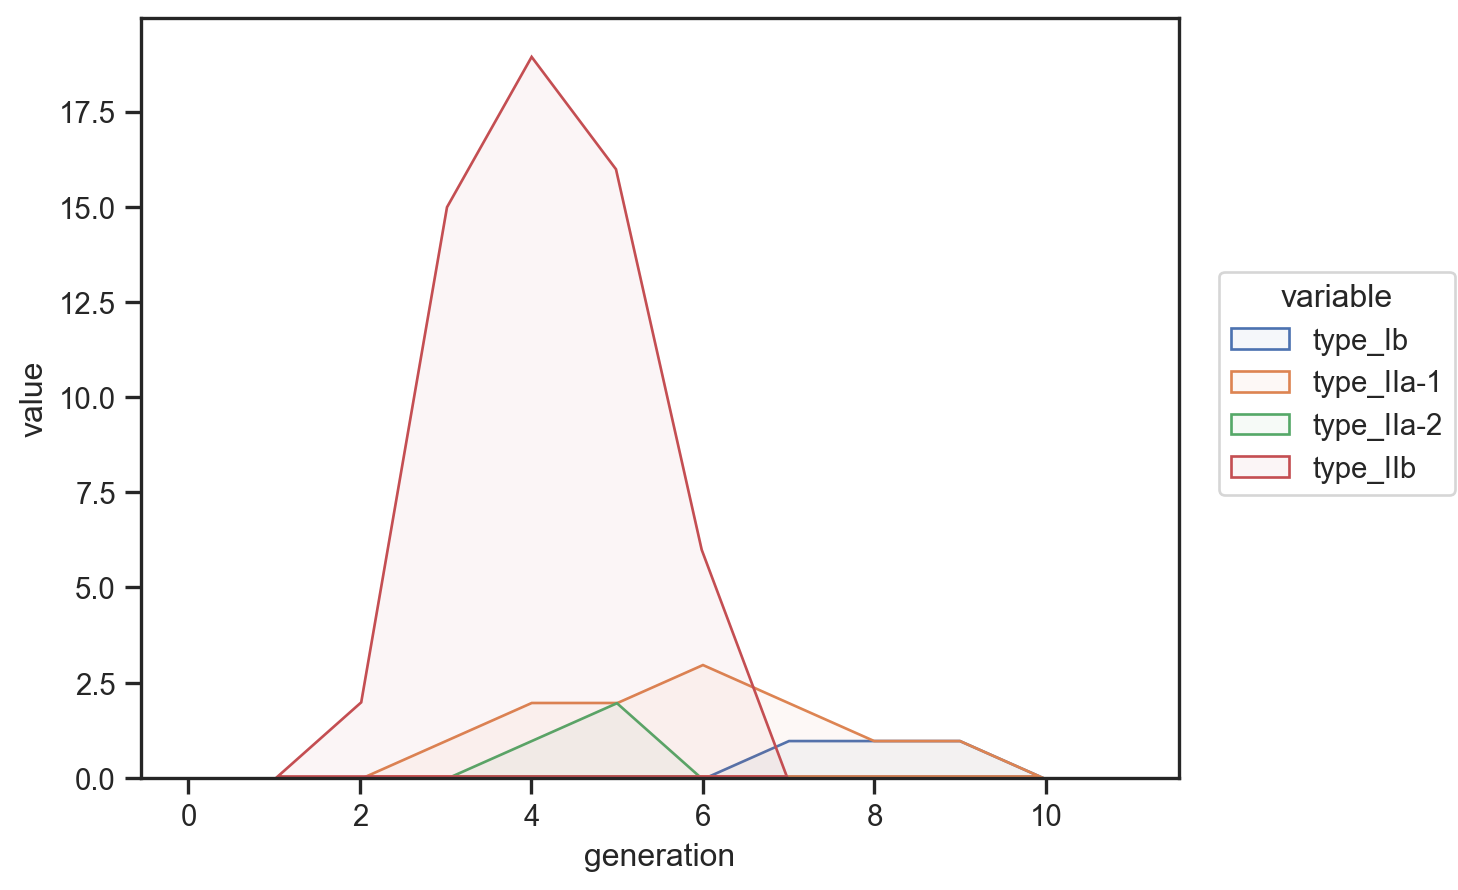

In [34]:
(
    so.Plot(pd.melt(spacer_selection_dataframe, id_vars='generation', value_vars=['type_Ib', 'type_IIa-1', 'type_IIa-2', 'type_IIb']), 
            x='generation', y='value', color='variable')
    .add(so.Area(alpha=0.05))
    .theme(axes_style('ticks'))
    #.scale(color={"type_Ib": "tab:red", "type_IIa-1": "tab:green", "type_IIa-2": "tab:green", "type_IIb": "tab:orange"})
    .save('../rawfigures/spacer_selection.svg')
)
